#### 1)Import Packages

In [1]:
import pypsa
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import subprocess
from shapely.errors import ShapelyDeprecationWarning
import logging

c:\Users\User\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\Users\User\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\Users\User\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


#### 2)Create a network and set Snapshots

In [2]:
# Create a new PyPSA network
network = pypsa.Network()
network.set_snapshots(range(1))  # Solve for a year 365*24

In [3]:
type(network)

pypsa.components.Network

#### 3)Add Buses

In [4]:
# Read excel file which contains Non renewable generators data
bus=pd.read_excel('data_exercise.xlsx',sheet_name='buses',header=0)

In [5]:
bus

,line,bus,v_nom,carrier,x,y
0,1,north_de,380,AC,9.598183,53.558527
1,2,east_de,380,AC,13.607778,51.076934
2,3,west_de,380,AC,6.802514,50.957803


In [6]:
for index, row in bus.iterrows():
    network.add(
        "Bus",
        name=row['bus'],
        v_nom=row['v_nom'],
        carrier=row['carrier'],
        x=row['x'],
        y=row['y']
    )

In [7]:
network.buses

,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network
Bus,,,,,,,,,,,,
north_de,380.0,,9.598183,53.558527,AC,,1.0,0.0,inf,PQ,,
east_de,380.0,,13.607778,51.076934,AC,,1.0,0.0,inf,PQ,,
west_de,380.0,,6.802514,50.957803,AC,,1.0,0.0,inf,PQ,,


#### 4)Add generators

In [8]:
# Read excel file which contains Non renewable generators data
generators=pd.read_excel('data_exercise.xlsx',sheet_name='generators')

In [9]:
generators

,generator,p_nom,p_nom_max,bus,p_nom_extendable,marginal_cost,lifetime,efficiency,start_up_cost,shut_down_cost,min_up_time,min_down_time,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
0,gen_no1,15,NaN,north_de,False,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,gen_no2,16,NaN,north_de,False,15,NaN,NaN,NaN,NaN,4.0,3.0,0.54,0.75,NaN,NaN
2,gen_no3,9,NaN,north_de,False,30,NaN,NaN,NaN,NaN,2.0,2.0,0.75,0.75,NaN,NaN
3,gen_ost1,10,NaN,east_de,False,15,NaN,NaN,NaN,NaN,2.0,2.0,0.75,0.75,NaN,NaN
4,gen_ost2,9,NaN,east_de,False,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,gen_ost3,5,NaN,east_de,False,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,gen_west1,30,NaN,west_de,False,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,gen_west2,10,NaN,west_de,False,40,NaN,NaN,NaN,NaN,2.0,2.0,0.75,0.75,NaN,NaN
8,gen_west3,15,NaN,west_de,False,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
from pivottablejs import pivot_ui

In [11]:
network.madd(
    "Generator",
    names= generators.generator,
    bus=list(generators.bus),
    carrier=list(generators.generator),
    p_nom=list(generators.p_nom),
    p_nom_max=list(generators.p_nom_max),  # MW
    p_nom_extendable=list(generators.p_nom_extendable),
    marginal_cost=list(generators.marginal_cost),
)
network.generators

C:\Users\User\AppData\Local\Temp\ipykernel_5092\1087367996.py:1: DeprecatedWarning:

madd is deprecated as of 0.31 and will be removed in 1.0. Use `n.add` as a drop-in replacement instead.



,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,...,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
gen_no1,north_de,PQ,,15.0,0.0,False,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_no2,north_de,PQ,,16.0,0.0,False,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_no3,north_de,PQ,,9.0,0.0,False,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_ost1,east_de,PQ,,10.0,0.0,False,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_ost2,east_de,PQ,,9.0,0.0,False,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_ost3,east_de,PQ,,5.0,0.0,False,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_west1,west_de,PQ,,30.0,0.0,False,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_west2,west_de,PQ,,10.0,0.0,False,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_west3,west_de,PQ,,15.0,0.0,False,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


In [12]:
network.generators

,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,...,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
gen_no1,north_de,PQ,,15.0,0.0,False,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_no2,north_de,PQ,,16.0,0.0,False,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_no3,north_de,PQ,,9.0,0.0,False,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_ost1,east_de,PQ,,10.0,0.0,False,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_ost2,east_de,PQ,,9.0,0.0,False,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_ost3,east_de,PQ,,5.0,0.0,False,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_west1,west_de,PQ,,30.0,0.0,False,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_west2,west_de,PQ,,10.0,0.0,False,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_west3,west_de,PQ,,15.0,0.0,False,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


#### 5)Add load

In [13]:
# Read excel file which contains Non renewable generators data
load=pd.read_excel('data_exercise.xlsx',sheet_name='load',header=0)

In [14]:
load

,bus,load
0,North_de,10
1,east_de,10
2,west_de,40


In [15]:
for index, row in load.iterrows():
    network.add(
        "Load",
        name=row['bus'],
        bus=row['bus'],
        p_set=row['load'],
    )

Index(['North_de'], dtype='object')


In [16]:
network.loads

,bus,carrier,type,p_set,q_set,sign,active
Load,,,,,,,
North_de,North_de,,,10.0,0.0,-1.0,True
east_de,east_de,,,10.0,0.0,-1.0,True
west_de,west_de,,,40.0,0.0,-1.0,True


#### 6)Add Transmission lines

In [17]:
# Read excel file which contains Non renewable generators data
lines=pd.read_excel('data_exercise.xlsx',sheet_name='lines',header=0)

In [18]:
lines.head()

,bus0,bus1,s_nom,r,x
0,north_de,east_de,500,0.0001,0.0001
1,east_de,west_de,500,0.0001,0.0001
2,west_de,north_de,500,0.0001,0.0001


In [19]:
# Add line connection between the buses
for index, row in lines.iterrows():
    network.add(
        "Line",
        "{}_{}".format(row['bus0'],row['bus1']),
        bus0=row['bus0'],
        bus1=row['bus1'],
        s_nom=row['s_nom'],
        x=1,
    )

In [20]:
network.lines

,bus0,bus1,type,x,r,g,b,s_nom,s_nom_mod,s_nom_extendable,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
north_de_east_de,north_de,east_de,,1.0,0.0,0.0,0.0,500.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
east_de_west_de,east_de,west_de,,1.0,0.0,0.0,0.0,500.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
west_de_north_de,west_de,north_de,,1.0,0.0,0.0,0.0,500.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
network

PyPSA Network
Components:
 - Bus: 3
 - Generator: 9
 - Line: 3
 - Load: 3
Snapshots: 1

#### 7)Solve the network

In [22]:
network.optimize(solver_name="highs")


Index(['gen_no1', 'gen_no2', 'gen_no3', 'gen_ost1', 'gen_ost2', 'gen_ost3',
       'gen_west1', 'gen_west2', 'gen_west3'],
      dtype='object', name='Generator')
Index(['north_de', 'east_de', 'west_de'], dtype='object', name='Bus')
Index(['north_de_east_de', 'east_de_west_de', 'west_de_north_de'], dtype='object', name='Line')
Index(['north_de_east_de', 'east_de_west_de', 'west_de_north_de'], dtype='object', name='Line')
Index(['North_de'], dtype='object', name='Load')
Index(['gen_no1', 'gen_no2', 'gen_no3', 'gen_ost1', 'gen_ost2', 'gen_ost3',
       'gen_west1', 'gen_west2', 'gen_west3'],
      dtype='object', name='Generator')
Index(['north_de', 'east_de', 'west_de'], dtype='object', name='Bus')
Index(['north_de_east_de', 'east_de_west_de', 'west_de_north_de'], dtype='object', name='Line')
Index(['north_de_east_de', 'east_de_west_de', 'west_de_north_de'], dtype='object', name='Line')
Index(['North_de'], dtype='object', name='Load')
c:\Users\User\anaconda3\Lib\site-packages\linopy\com

('ok', 'optimal')

In [23]:
network.buses_t.marginal_price

Bus,north_de,east_de,west_de
snapshot,,,
0,20.0,20.0,20.0


In [24]:
clearing_price_redisp = network.buses_t.marginal_price.iloc[0].max()
clearing_price_redisp

20.0

In [25]:
network.generators.p_nom_opt

Generator
gen_no1      15.0
gen_no2      16.0
gen_no3       9.0
gen_ost1     10.0
gen_ost2      9.0
gen_ost3      5.0
gen_west1    30.0
gen_west2    10.0
gen_west3    15.0
Name: p_nom_opt, dtype: float64

<Axes: xlabel='Generator', ylabel='MW'>

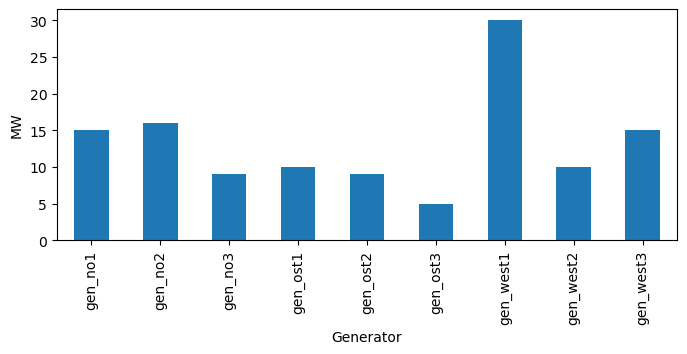

In [26]:
network.generators.p_nom_opt.plot.bar(ylabel="MW", figsize=(8, 3))

In [27]:
network.lines_t.p0

Line,north_de_east_de,east_de_west_de,west_de_north_de
snapshot,,,
0,7.333333,16.333333,-23.666667


In [28]:
gen = network.generators.assign(g=network.generators_t.p.mean()).groupby(["bus", "carrier"]).g.sum()
gen

bus       carrier  
east_de   gen_ost1     10.0
          gen_ost2      9.0
          gen_ost3      0.0
north_de  gen_no1      15.0
          gen_no2      16.0
          gen_no3       0.0
west_de   gen_west1     0.0
          gen_west2     0.0
          gen_west3     0.0
Name: g, dtype: float64

In [29]:
flow = pd.Series(10, index=network.branches().index)
flow

component  name            
Line       north_de_east_de    10
           east_de_west_de     10
           west_de_north_de    10
dtype: int64

c:\Users\User\anaconda3\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning:

facecolor will have no effect as it has been defined as "never".



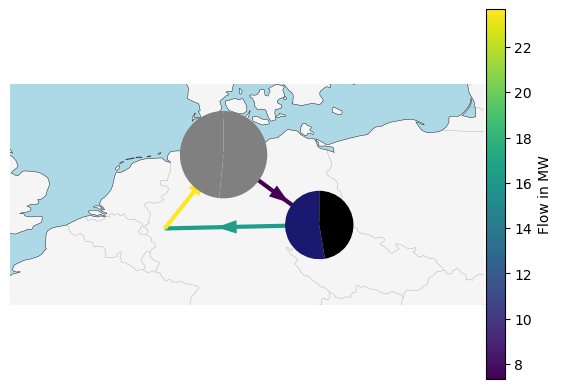

In [44]:
plot_graph=network.plot(
    bus_sizes=gen/10,
    bus_colors={"gen_ost1":"midnightblue","gen_ost2": "black","gen_ost3": "yellow", "gen_no1": "gray","gen_no2":"gray","gen_no3":"midnightblue","gen_west1":"cyan","gen_west2":"yellow","gen_west3":"gray"},
    margin=1,
    line_widths=3,
    link_widths=0,
    flow=flow,
    color_geomap=True,
    projection=ccrs.EqualEarth(),
    line_colors=network.lines_t.p0.mean().abs(),
)
plt.colorbar(plot_graph[2], fraction=0.04, pad=0.004, label="Flow in MW")
plt.show()

In [32]:
import cartopy.crs as ccrs
